# Capstone Project Submission

* Student name: Bryan DiCarlo
* Student pace: Full Time Online 4/15/19 Cohort
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL: 

# Introduction
- Here we will investigate the NBA shots log data set. A publicly available data set from Kaggle.
- The growing trend in the NBA, based in analytics, is to rely on high percentage close range shots or the 3-point shot.  Shots with the highest “make” percentage and the highest reward, respectively.
- We will conduct an in-depth analysis of 2 and 3-point shots attempted and made.  Shooting percentages for each shot type broken down by quarter and overtime periods.  We will also look at the best close-range, mid-range, and long-range shooters as well as the best defenders.
- We will also use machine learning to see how accurately we can classify who won the game and if a shot was made or missed using the information available in the data set.


# Abstract
- With massive amounts of readily available data, professional sports teams, like most businesses, rely heavily on data analytics to guide their evolution.  The NBA is no different.  The game looks very different than it did 30, 20 or even 5 years ago.  In the past the game was dominated by “Big Men” who played close to the basket.  The offense was centered around getting the ball first to the center near the basket.  The center would either take the shot or pass to an open man if double teamed.  The 3-point shot was considered a risky low percentage shot. Rather than a first option, it was considered a second or third option.
- Analytics has changed the mindset and offensive strategy of many, if not all teams.  Teams began to realize the risk was worth the reward.  The idea that 3 is always greater than 2 began to take hold.  Shooting 10 3-point shots at 40% is still better than shooting 10 2-point shots at 50%.  Now teams like the Houston Rockets base their offense on a two-shot outcome.  Shoot a 3-pointer or take the highest percentage shot within 5 feet from the basket.  Teams like the Rockets have reversed the older paradigm.  They spread the floor with four shooters beyond the 3-point arc and have one “big man” under the basket.  They look to get the ball to an open 3-point shooter first to take the shot.  If the defender under the basket comes out to help defend the 3-point shooters the ball is then passed to the one person under the basket for a dunk or a lay-up.  The mid-range shot is not completely dead.  There are still players like Chris Paul and Dirk Nowitzki who are good enough shooters form anywhere on the court that they always have the green light when they are open.  Here we will look at some of the best close-range, mid-range and long-range shooters. As well as defenders.  Good defense never goes out of style.  We will also use machine learning to classify or “predict” shots made or missed and who won the game. 


# The Data Set
- NBA shots log 2014-2015 is a publicly available data set from Kaggle.
- The data set provides information pertaining to field goals attempted during this season.
- It provides information on field goals made, the type of shot (2 or 3), number of shots a player took, the closest defender, period of the game the shot was taken and many others.
- The data is available on Kaggle and the complete .csv file is included in the GitHub repository associated with this project.


# Objective and Methodology
- We will follow the OSEMN framework
- The project analysis is contained in three Jupyter notebooks
- Notebook 1:
	- Plotly analysis of 2 and 3-point shots made and missed
	- Plotly analysis of 2 and 3-point shooting percentages by game period
	- Plotly analysis of how shot distance is affected by closest defender
	- Machine learning classification of game winner or loser
- Notebook 2:
	- Overall look at scorers and defenders in the NBA using Tableau dashboard
	- In depth statistical analysis of best defenders, best close, mid and long-range shooters
	- This analysis will be visualized using Tableau
- Notebook 3:
    - In depth machine learning analysis to find the best model for predicting shots made and missed


# 1. Investigate NBA 2 and 3 Point Shot Data Using Plotly

## 1.1 EDA

In [41]:
#Initial Imports
import pandas as pd
import numpy as np
from datetime import datetime
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
# Read Data from CSV file
df1 = pd.read_csv('shot_logs.csv')

In [43]:
# Visualize DataFrame
df1.head()

GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  PTS_TYPE  \
0       1       1:09       10.80         2  ...       7.70         2   
1       1       0:14        3.40         0  ...      28.20         3   
2       1       0:00         nan         3  ...      10.10         2   
3       2      11:47       10.30         2  ...      17.20         2   
4       2      10:34       10.90         2  ...       3.70         2   

   SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  \
0         made     Anderson, Alan                     101187            1.30   
1       missed  Bogdanovic, Bojan                     202711            6.10   
2       missed  Bogdanovic, Bojan                     202711            0.90   
3       missed      Brown, Markel                     203900            3.40   
4       missed    Young, Thaddeus                     201152            1.10   

   FGM  PTS    player_name player_id  
0    1    2  brian roberts    203148  
1    0    0  brian roberts    203148  
2    0    0  brian roberts    203148  
3    0    0  brian roberts    203148  
4    0    0  brian roberts    203148  

[5 rows x 21 columns]

In [44]:
# Investigate the dimensions of the DataFrame
df1.shape

(128069, 21)

In [45]:
# Investigate the Numerical entries of the DataFrame
df1.describe()

GAME_ID  FINAL_MARGIN  SHOT_NUMBER     PERIOD  SHOT_CLOCK  \
count    128,069.00    128,069.00   128,069.00 128,069.00  122,502.00   
mean  21,400,451.88          0.21         6.51       2.47       12.45   
std          257.88         13.23         4.71       1.14        5.76   
min   21,400,001.00        -53.00         1.00       1.00        0.00   
25%   21,400,233.00         -8.00         3.00       1.00        8.20   
50%   21,400,449.00          1.00         5.00       2.00       12.30   
75%   21,400,673.00          9.00         9.00       3.00       16.67   
max   21,400,908.00         53.00        38.00       7.00       24.00   

        DRIBBLES  TOUCH_TIME  SHOT_DIST   PTS_TYPE  \
count 128,069.00  128,069.00 128,069.00 128,069.00   
mean        2.02        2.77      13.57       2.26   
std         3.48        3.04       8.89       0.44   
min         0.00     -163.60       0.00       2.00   
25%         0.00        0.90       4.70       2.00   
50%         1.00        1.60      13.70       2.00   
75%         2.00        3.70      22.50       3.00   
max        32.00       24.90      47.20       3.00   

       CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST        FGM        PTS  \
count                  128,069.00      128,069.00 128,069.00 128,069.00   
mean                   159,038.49            4.12       0.45       1.00   
std                     78,791.17            2.76       0.50       1.13   
min                        708.00            0.00       0.00       0.00   
25%                    101,249.00            2.30       0.00       0.00   
50%                    201,949.00            3.70       0.00       0.00   
75%                    203,079.00            5.30       1.00       2.00   
max                    530,027.00           53.20       1.00       3.00   

       player_id  
count 128,069.00  
mean  157,238.25  
std    79,362.39  
min       708.00  
25%   101,162.00  
50%   201,939.00  
75%   202,704.00  
max   204,060.00

## 1.2 Prepare Data For Visual Analysis

In [46]:
# Covert String Columns to Binary
df1['HOME_GAME'] = np.where(df1['LOCATION'] == 'H', 1, 0)
df1['GAME_WON'] = np.where(df1['W'] == 'W', 1, 0)

In [47]:
# Extract the date from the MATCHUP string through slicing and convert to date-time 
df1['DATE'] = df1['MATCHUP'].str[:12]
df1['DATE'] = pd.to_datetime(df1['DATE'], format='%b %d, %Y')

In [48]:
# Split the DataFrame by 2 and 3 point field goals
two_point_shots = df1['PTS_TYPE'] == 2
three_point_shots = df1['PTS_TYPE'] == 3

# Split the DataFrame by missed/made field goals
missed = df1['FGM'] == 0
made = df1['FGM'] == 1

# Create Categories for Plotly view
missed_twos = df1[two_point_shots & missed]
made_twos = df1[two_point_shots & made]

missed_threes = df1[three_point_shots & missed]
made_threes = df1[three_point_shots & made]

## 1.3 Plotly Graph of Number of Made and Missed 2 and 3-pointers

In [49]:
trace1 = go.Bar(
    x=df1[two_point_shots]['FGM'].value_counts().index.values,
    y=df1[two_point_shots]['FGM'].value_counts(),
    name='2-Point Field Goals'
)
trace2 = go.Bar(
    x=df1[three_point_shots]['FGM'].value_counts().index.values,
    y=df1[three_point_shots]['FGM'].value_counts(),
    name='3-Point Field Goals'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of Made and Missed 2 and 3 point Field Goals',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Missed', 'Made']
    ),
    yaxis=dict(
        title='Number of Shots'
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [50]:
# Display shooting Percentage for 2 and 3 point field goals
print(75* "-")
print('Average 2-point Shooting Percentage ' + str(round(len(made_twos) / len(df1[two_point_shots]), 2)) +'%')
print('Average 3-point Shooting Percentage ' + str(round(len(made_threes) / len(df1[three_point_shots]), 2)) +'%')
print(75* "-")

---------------------------------------------------------------------------
Average 2-point Shooting Percentage 0.49%
Average 3-point Shooting Percentage 0.35%
---------------------------------------------------------------------------


## 1.4 Analyze 2 and 3 Point Shooting Percentage by Quarter and Overtime Periods


In [51]:
# Prepare data for plotting
shots_by_period = df1.groupby(['PERIOD','PTS_TYPE'])['FGM'].agg(['sum','count'])
shots_by_period['percentage'] = round((shots_by_period['sum'] / shots_by_period['count']), 2)

two_point_shots_by_period = shots_by_period.xs(2, level=1)
three_point_shots_by_period = shots_by_period.xs(3, level=1)

In [52]:
trace1 = go.Scatter(
    x=two_point_shots_by_period.index,
    y=two_point_shots_by_period['percentage'].values,
    name='2-Point Field Goal'
)
trace2 = go.Scatter(
    x=three_point_shots_by_period.index,
    y=three_point_shots_by_period['percentage'].values,
    name='3-Point Field Goal'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Field Goal Percentage by Quarter',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7],
        ticktext = ['Q1', 'Q2', 'Q3', 'Q4', 'OT1', 'OT2', 'OT3']
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 1.5 How Shot Distance is Affected by Closest Defender

In [53]:
trace1 = go.Scattergl(
    x=df1['SHOT_DIST'],
    y=df1['CLOSE_DEF_DIST'],
    mode='markers',
    marker=dict(
        opacity=0.5
    )
)

data=[trace1]
layout = go.Layout(
    title='How Shot Distance is Affected by Closest Defender')
    
figure = go.Figure(data=data, layout=layout)

py.iplot(figure)

# 2. Use Machine Learning to See if We Can Predict the Outcome of the Game
- We have data more related to individual shooting statistics
- We will use the appropriate numerical values.
- Will be interesting to see how effective individual shooting statistics will be in determining the outcome of the game
- Shot clock is the only numerical value with NaN.  We will ignore as it should not affect this analysis
- Obviously a negative margin of victory would give it away.  We will change all margins to positve values

## 2.1 Imports

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import warnings
np.random.seed(10)
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

## 2.2 Data Pre-Processing

In [55]:
# Convert negative margins of victory to positive for fairness in model
df1['FINAL_MARGIN'] = df1.FINAL_MARGIN.abs()

In [56]:
df1.describe()

GAME_ID  FINAL_MARGIN  SHOT_NUMBER     PERIOD  SHOT_CLOCK  \
count    128,069.00    128,069.00   128,069.00 128,069.00  122,502.00   
mean  21,400,451.88         10.72         6.51       2.47       12.45   
std          257.88          7.76         4.71       1.14        5.76   
min   21,400,001.00          1.00         1.00       1.00        0.00   
25%   21,400,233.00          5.00         3.00       1.00        8.20   
50%   21,400,449.00          9.00         5.00       2.00       12.30   
75%   21,400,673.00         15.00         9.00       3.00       16.67   
max   21,400,908.00         53.00        38.00       7.00       24.00   

        DRIBBLES  TOUCH_TIME  SHOT_DIST   PTS_TYPE  \
count 128,069.00  128,069.00 128,069.00 128,069.00   
mean        2.02        2.77      13.57       2.26   
std         3.48        3.04       8.89       0.44   
min         0.00     -163.60       0.00       2.00   
25%         0.00        0.90       4.70       2.00   
50%         1.00        1.60      13.70       2.00   
75%         2.00        3.70      22.50       3.00   
max        32.00       24.90      47.20       3.00   

       CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST        FGM        PTS  \
count                  128,069.00      128,069.00 128,069.00 128,069.00   
mean                   159,038.49            4.12       0.45       1.00   
std                     78,791.17            2.76       0.50       1.13   
min                        708.00            0.00       0.00       0.00   
25%                    101,249.00            2.30       0.00       0.00   
50%                    201,949.00            3.70       0.00       0.00   
75%                    203,079.00            5.30       1.00       2.00   
max                    530,027.00           53.20       1.00       3.00   

       player_id  HOME_GAME   GAME_WON  
count 128,069.00 128,069.00 128,069.00  
mean  157,238.25       0.50       0.50  
std    79,362.39       0.50       0.50  
min       708.00       0.00       0.00  
25%   101,162.00       0.00       0.00  
50%   201,939.00       0.00       1.00  
75%   202,704.00       1.00       1.00  
max   204,060.00       1.00       1.00

In [57]:
# Keep only numerical cloumns
df_win = df1[['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST','FGM','PTS','HOME_GAME','GAME_WON']]

In [58]:
df_win.head()

FINAL_MARGIN  SHOT_NUMBER  PERIOD  DRIBBLES  SHOT_DIST  PTS_TYPE  \
0            24            1       1         2       7.70         2   
1            24            2       1         0      28.20         3   
2            24            3       1         3      10.10         2   
3            24            4       2         2      17.20         2   
4            24            5       2         2       3.70         2   

   CLOSE_DEF_DIST  FGM  PTS  HOME_GAME  GAME_WON  
0            1.30    1    2          0         1  
1            6.10    0    0          0         1  
2            0.90    0    0          0         1  
3            3.40    0    0          0         1  
4            1.10    0    0          0         1

In [59]:
df_win.shape

(128069, 11)

In [60]:
# Investigate Target class balance
df_win.GAME_WON.value_counts()

1    64595
0    63474
Name: GAME_WON, dtype: int64

## 2.3 Investigate Target and Feature relationships prior to Modeling

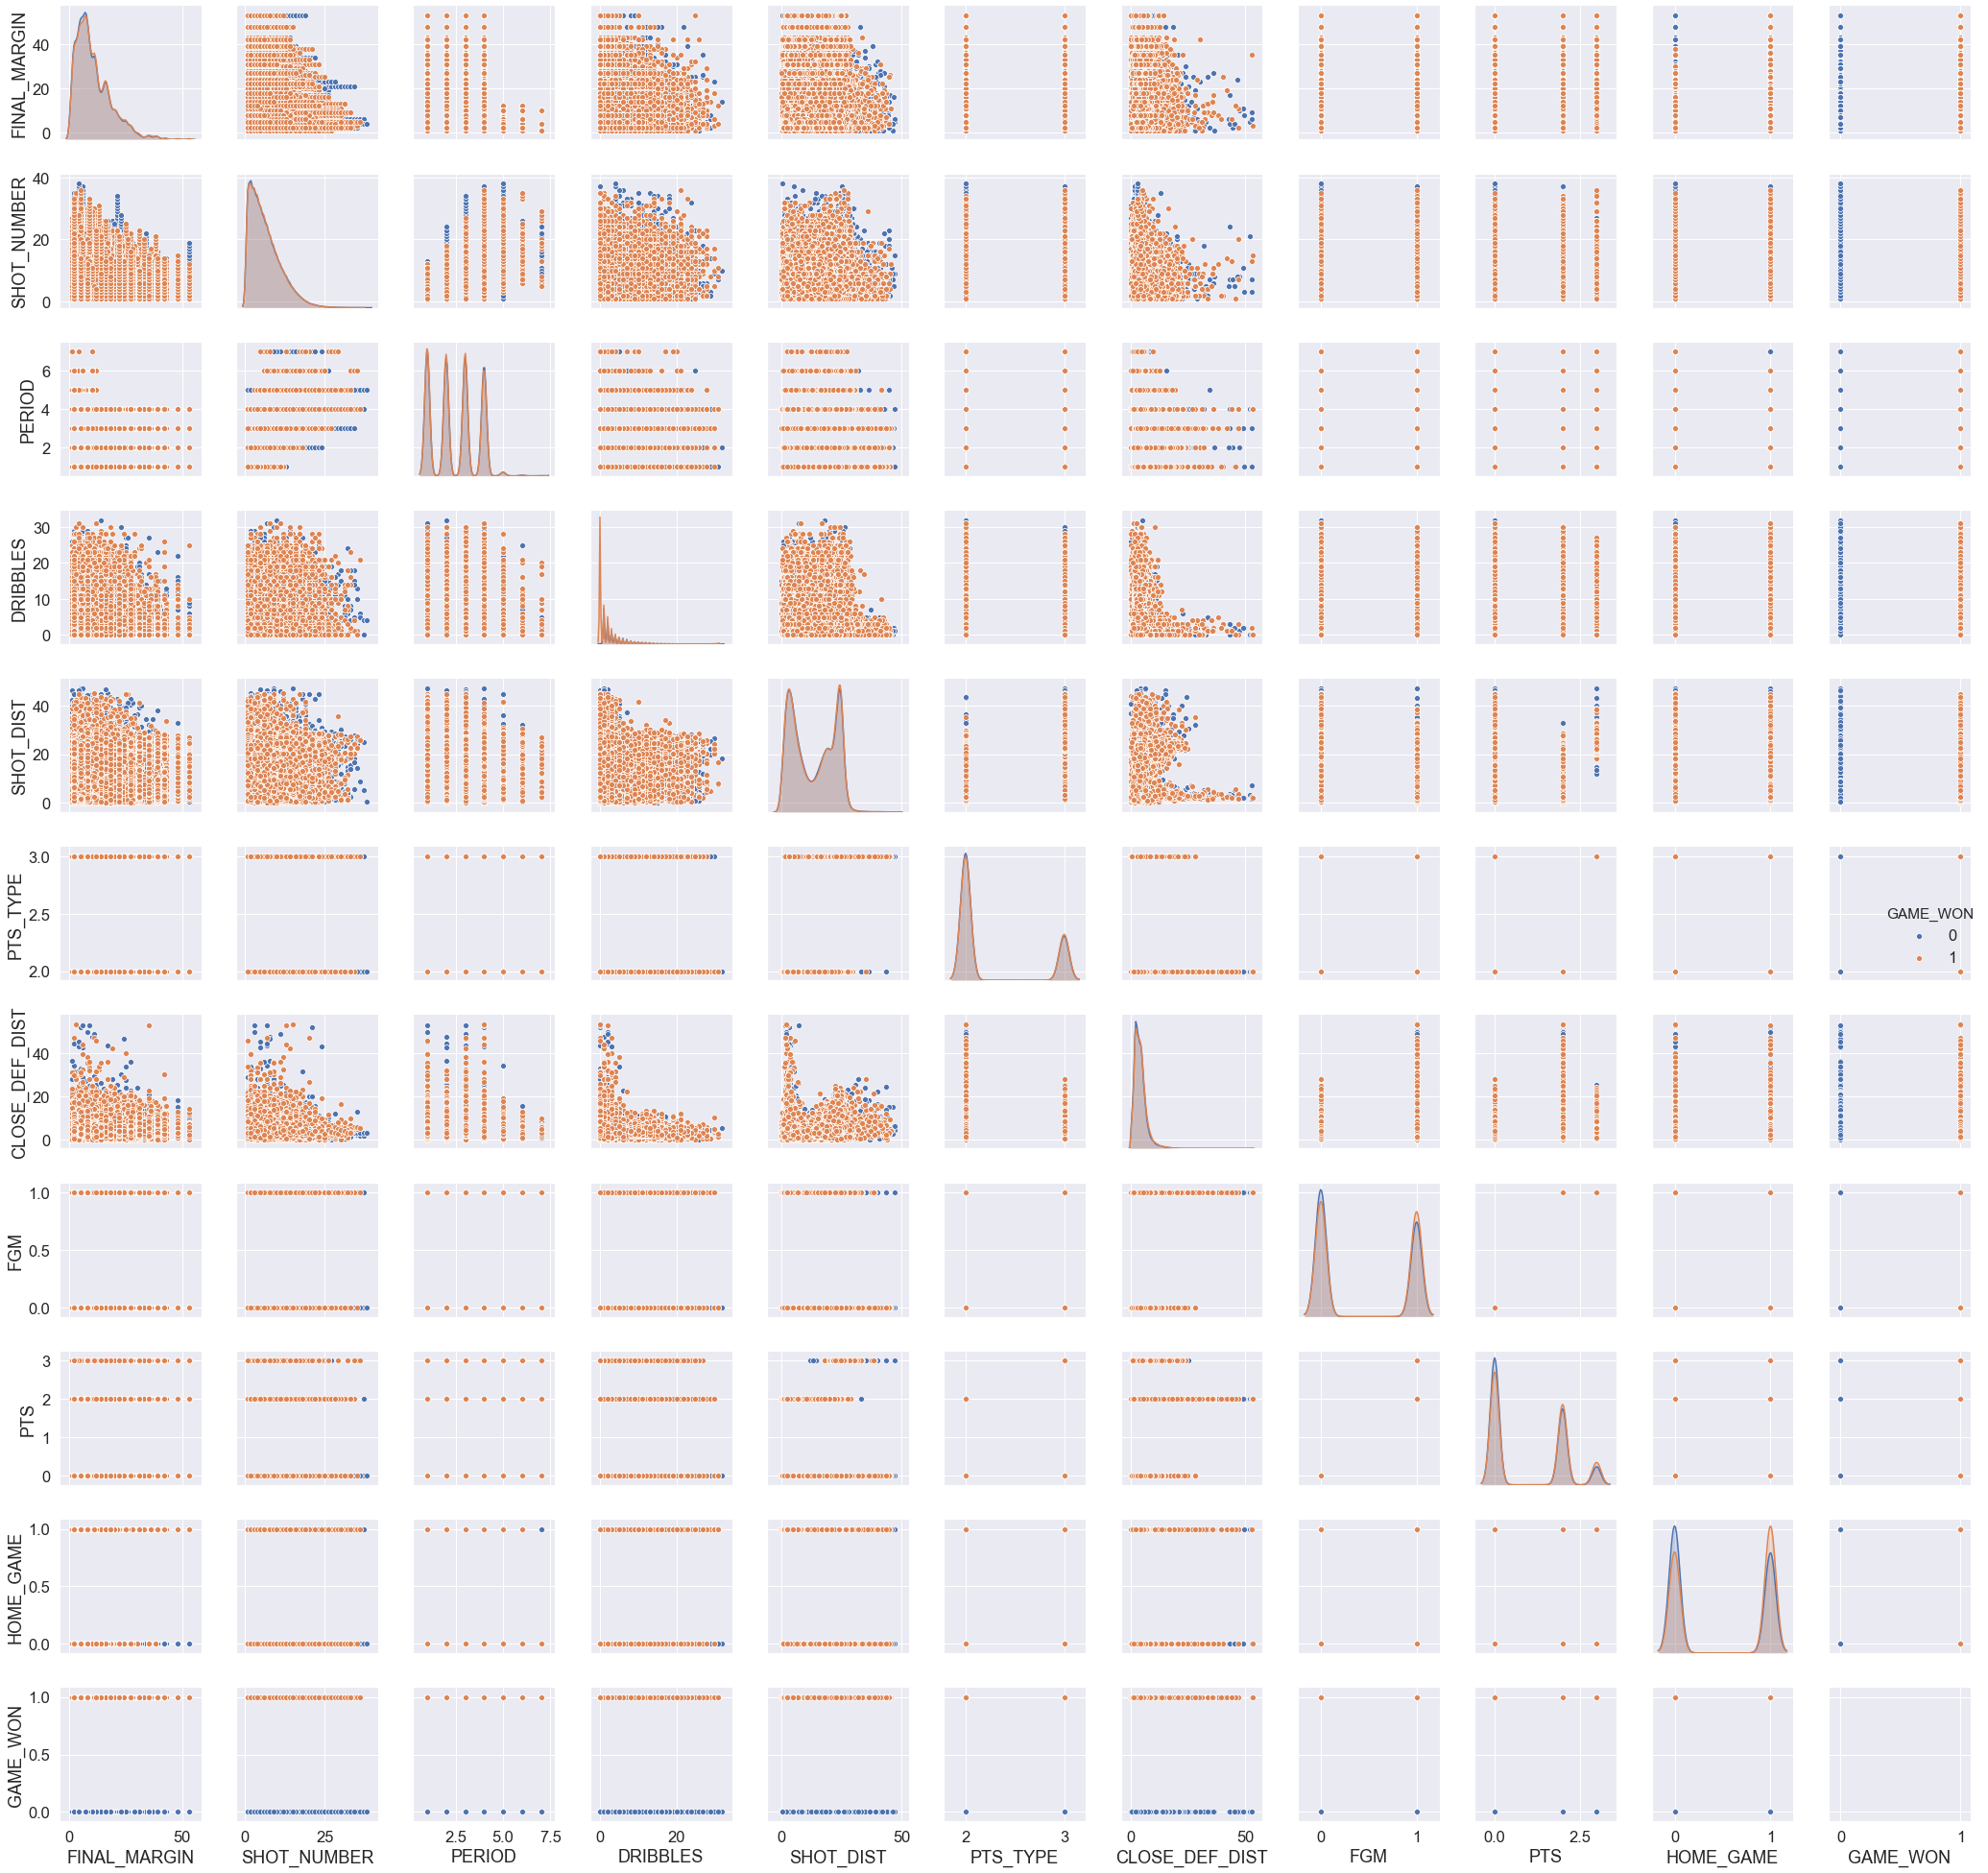

In [61]:
# To see the actual distribution of data 
sns.set(font_scale=1.5)
sns.pairplot(df_win, hue = 'GAME_WON')
plt.tight_layout()
plt.show()

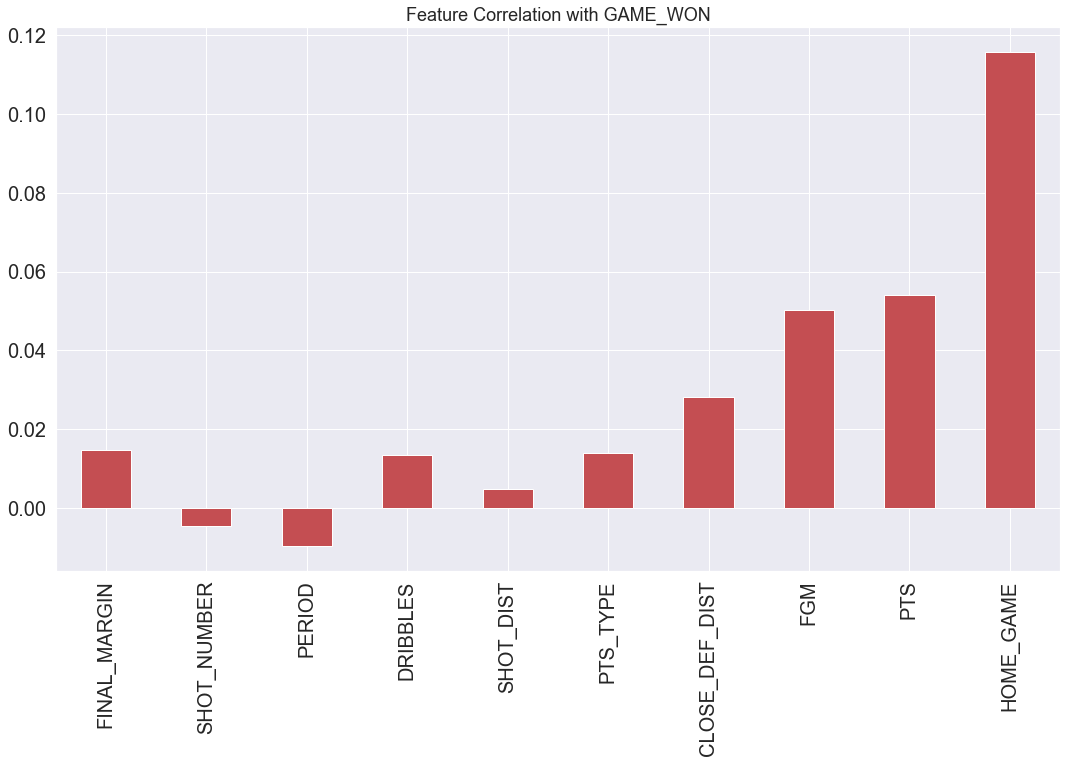

In [62]:
# Investigate the correlation between Target class and features
features = df_win.drop(['GAME_WON'], axis=1)
target = df_win.GAME_WON
features.corrwith(target).plot.bar(
        figsize = (18, 10), color='r', title = "Feature Correlation with GAME_WON", fontsize = 20,
        rot = 90, grid = True)
plt.show()


## 2.4 Build Baseline Gradient Boosting Classifier to Predict Game Outcome
- Our features are not strongly correlated with game outcome
- This was expected. These are individual shooting statistics.  If we can build a model that predicts game outcome greater than an arbitrary coin-flip value this will give teams insight into how individual performances influence outcomes.
- I am not expecting a model with high predictive value.  I am hoping to find a model that predicts above a random chance level.
- Then by analysisng the features most important to the model this could provide teams with adddition insight

### 80/20 Train Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=10)

### Baseline Gradient Boosting Classifier Model

In [64]:
gbt_clf = GradientBoostingClassifier(random_state=10)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
y_pred_gbt = gbt_clf.predict(X_test)

### Classification Report and Confusion Matrix for Baseline Gradient Boosting Classifier Model

In [66]:
# Evaluation metrics for baseline Gradient Boosting Classifier Model
print(60*'-')
print('Baseline Gradient Boosting Classifier Model Using All Features')
print(60*'-')
report_gbt = classification_report(y_test, y_pred_gbt)
print(report_gbt)
print(60*'-')

------------------------------------------------------------
Baseline Gradient Boosting Classifier Model Using All Features
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     12613
           1       0.59      0.60      0.59     13001

    accuracy                           0.58     25614
   macro avg       0.58      0.58      0.58     25614
weighted avg       0.58      0.58      0.58     25614

------------------------------------------------------------


In [67]:
# function to visualize confusion Matrix
def conf_matrix(y_actual, y_predicted, cmap='Greens'):
    class_names = ['Loss', 'Won']
    mat = confusion_matrix(y_actual, y_predicted)
    dataframe = pd.DataFrame(mat, index=class_names, columns=class_names)
    plt.figure(figsize=(10,5))
    sns.heatmap(dataframe, annot=True, cbar=None, cmap=cmap, fmt='.00f', annot_kws={"size":13})
    plt.title("Confusion Matrix", fontsize=18), plt.tight_layout()
    plt.ylabel("True Class",fontsize=15), plt.xlabel('Predicted Class', fontsize=15)
    plt.show()

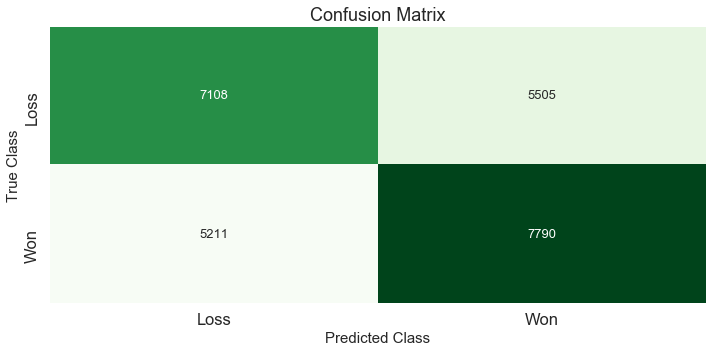

In [68]:
conf_matrix(y_test, y_pred_gbt)

### Visualize Feature Importance to See How We Can Improve our Model

In [69]:
# Function to visually inspect feature importances
def plot_feat_imp(model_classifier, data=features, color='r'):
    importances1 = model_classifier.feature_importances_
    features1 = data.columns
    features_importance1 = pd.DataFrame(importances1, index=features1, columns=['Importance'])
    sorted_feat_imp1 = features_importance1.sort_values('Importance', axis=0, ascending=False)
    plt.figure(figsize=(12,5))
    plt.title('Feature Importance in Model', fontsize=18)
    tmp = sorted_feat_imp1['Importance'].values.tolist()
    plt.bar(range(data.shape[1]), tmp, color=color )
    plt.xticks(range(data.shape[1]), sorted_feat_imp1.index, rotation=45, ha='center', fontsize=12)
    plt.xlim(-1, data.shape[1])
    plt.ylabel('Importance', fontsize=15)
    plt.tight_layout()
    plt.show()

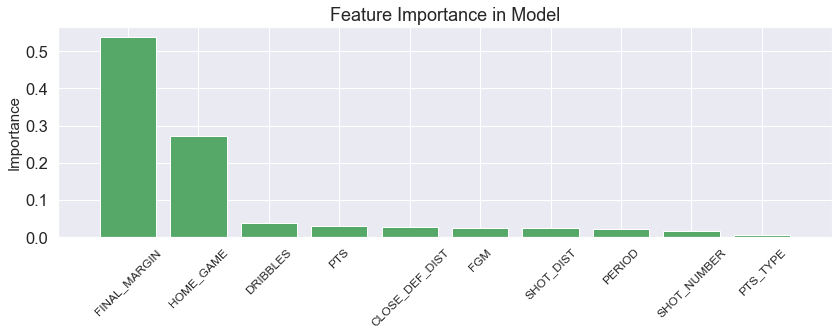

In [70]:
plot_feat_imp(gbt_clf, color='g')

## 2.5 Optimize Gradient Boosting Classifier Model

In [71]:
# Use Gradient Boosting Classifier with Optimized parameters
gbt_clf2 = GradientBoostingClassifier(n_estimators=27, max_depth=9, random_state=10, max_features=4, learning_rate=0.10)
gbt_clf2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
y_pred_gbt2 = gbt_clf2.predict(X_test)

### Classification Report and Confusion Matrix for Optimized Gradient Boosting Classifier Model

In [73]:
# Evaluation metrics for Optimized Gradient Boosting Classifier Model
print(60*'-')
print('Optimized Gradient Boosting Classifier Model Using All Features')
print(60*'-')
report_gbt2 = classification_report(y_test, y_pred_gbt2)
print(report_gbt2)
print(60*'-')

------------------------------------------------------------
Optimized Gradient Boosting Classifier Model Using All Features
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     12613
           1       0.60      0.60      0.60     13001

    accuracy                           0.59     25614
   macro avg       0.59      0.59      0.59     25614
weighted avg       0.59      0.59      0.59     25614

------------------------------------------------------------


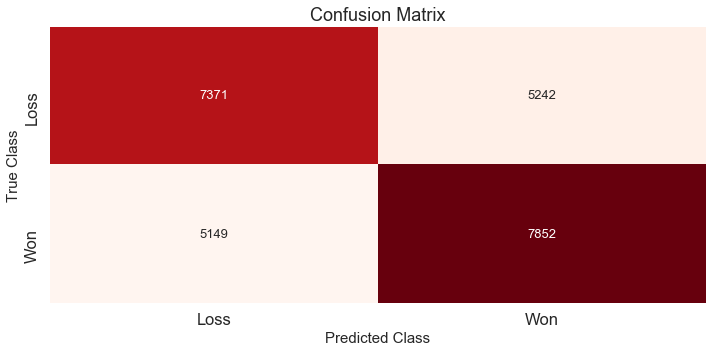

In [74]:
conf_matrix(y_test, y_pred_gbt2, cmap='Reds')

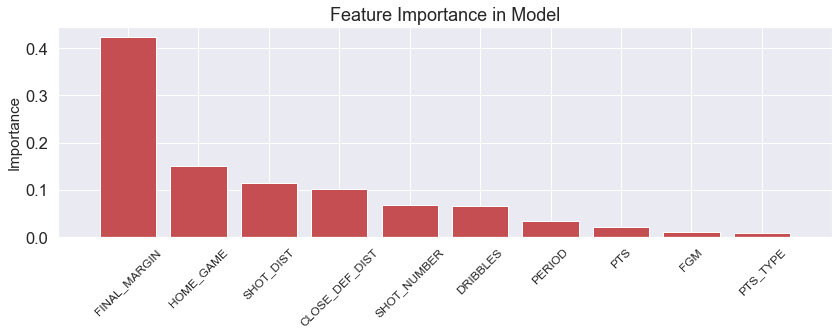

In [75]:
plot_feat_imp(gbt_clf2, color='r')

### Train and Test Scores for Final Model

In [76]:
# Train and Test Scores For Final GB Model
print("Gradient Boosting Classifier Final Train Scores: {}".format(gbt_clf2.score(X_train, y_train)))
print("Gradient Boosting Classifier Final Test Scores: {}".format(gbt_clf2.score(X_test, y_test)))

Gradient Boosting Classifier Final Train Scores: 0.6268605729344591
Gradient Boosting Classifier Final Test Scores: 0.594323416881393


### 10-fold CV scores for Gradient Boosting Classifier Model

In [77]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
gbt_kf = KFold(n_splits=10, shuffle=True, random_state=10)
gbt_cv_results_a = cross_val_score(gbt_clf2, features, target, cv=gbt_kf, scoring="accuracy", n_jobs=-1) 
gbt_cv_results_p = cross_val_score(gbt_clf2, features, target, cv=gbt_kf, scoring="precision_weighted", n_jobs=-1)
gbt_cv_results_r = cross_val_score(gbt_clf2, features, target, cv=gbt_kf, scoring="recall_weighted", n_jobs=-1)
gbt_cv_results_f = cross_val_score(gbt_clf2, features, target, cv=gbt_kf, scoring="f1_weighted", n_jobs=-1)

### Plot 10-Fold CV Scores for Our Models

In [78]:
# Define Variables for Plot
res = [gbt_cv_results_a, gbt_cv_results_p, gbt_cv_results_r, gbt_cv_results_f]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [79]:
# Function for plotting the 10 fold cross validated scores for Final GB Model
def cv_plot(names=names, res=res, a='All Metrics'):
    plt.figure(figsize=(18,5))
    sns.boxplot(x=names, y=res, notch=False)
    plt.title('10-Fold CV {} Final GB Model'.format(a), fontsize=18)
    plt.ylabel('10-Fold CV Scores', fontsize= 15)
    plt.show()

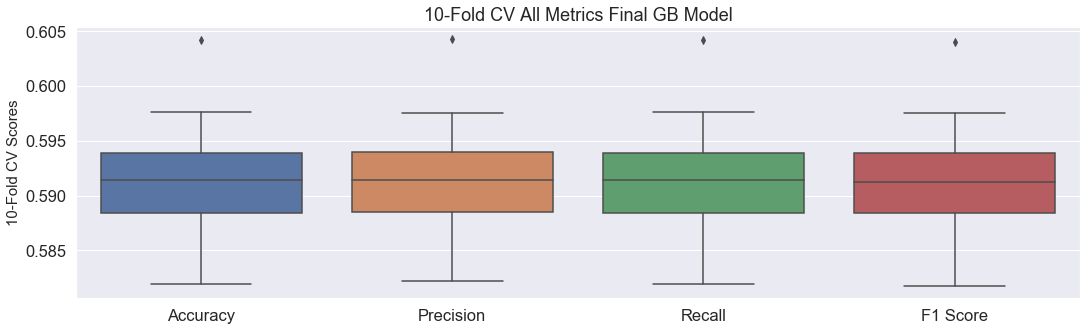

In [80]:
cv_plot()

# Conclusions From Notebook 1
- Our data set contains shot log data from the 2014-2015 NBA Season
- With the introduction of the three point shot the NBA has evolved into one of the most important aspects of the game.
- The game was previously dominated by "Big Men" and the inside close-range game.
- Through analytics teams have come to rely more on the three-point shot.  Shooting percentages are lower for 3-point shots, but teams have come to realize the cost benefit is in their favor to attempt more 3-point shots.  All around players with the ability to shoot the 3-point shot at high percentages are coveted in today's game.
- The underlying analysis was simple. A 50% increase in points outweighs the lower shooting percentage associated with this shot. Teams shoot more 3's and make more threes than ever before.
- Teams like the Houston Rockets base their entire offensive scheme around this.  The offensive is designed around taking either three-point shots or close range under the basket shots.  The first being the most effective in terms of points and the latter the highest percentage shot in the game.  The Rockets almost eliminated the mid-range shot.  They see this shot as the least in both regards.
- We visualized the number of 2- and 3-point shots over the season.  2-point shots still far outweigh the number of 3-point shots attempted.  We only had one year to analyze. But my guess is the number of 3-point shots has steadily increased.  And has increased even more in the age of analytics.
- We saw that the overall shooting percentage for two-point shots was 49%. And 35% for 3-point shots
- Our analysis confirms what is easily seen in todays game.  The three-point shot is an import part of the offensive strategy in today’s game.
- For fun I also tried to see if I could predict the outcome of the game by looking at the limited shooting statistics in this data set.  We did better than a coin flip.  Our Model had a prediction accuracy of around 60%.  Not surprisingly the margin of victory and home team were the two most important factors.  This model would be greatly enhanced with statistics like steals, turnovers, free-throws attempted and other statistics that are usually skewed in the winner or losers favor.  However, these were not available in our data set.


# Future Work
- I will do further analysis in a subsequent notebook.
- The data is better suited for analyzing things like best shooters and defenders.
- Since we do have data geared towards shooting and defense.  I would like to create another model to predict shot outcome. We know the overall 2-point percentage and 3-point percentage were 49% and 35% respectively for the season.
- I will build a model to see if I can predict made shots better than these ground truth averages.
